In [ ]:
# Задание 1. 

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [133]:
DATA_PATH = "C:\\Users\\DMITRY\\PY\\"

In [ ]:
def count_top3(years):
    columns = ['Name','Gender','Count']
    big_data = []
    for year in years: 
        big_data.append(pd.read_csv(
            (DATA_PATH + 'yob{0}.txt'.format(year)), 
            names=columns
        ))
    big_frame = pd.concat(big_data, ignore_index=True)
    big_frame = big_frame.groupby(['Name','Gender']).sum().sort_values(by='Count', ascending=False).reset_index()
    return big_frame.Name.tolist()[:3]

In [219]:
def count_dynamics(years):
    columns = ['Name','Gender','Count']
    output_dict = {}
    m_list = []
    f_list = []
    for year in years: 
        names = pd.read_csv(
            (DATA_PATH + 'yob{0}.txt'.format(year)), 
            names=columns
            )
        m_list.append(names[names.Gender=='M'].Count.sum())
        f_list.append(names[names.Gender=='F'].Count.sum())
    output_dict["M"] = m_list
    output_dict["F"] = f_list
    return output_dict

{'M': [150486, 1790871, 1962744], 'F': [299810, 1713259, 1814922]}


# # Задание 2.

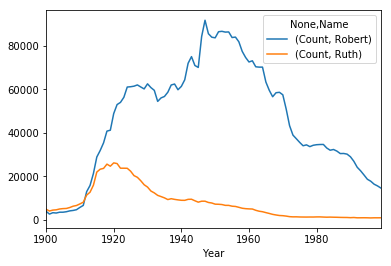

In [348]:
#Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
names_by_year = {}
for year in range(1900,2000,1): 
        names_by_year[year] = pd.read_csv(
            (DATA_PATH + 'yob{0}.txt'.format(year)), 
            names=columns
        )
names_all = pd.concat(names_by_year, names=["Year", "Pos"])
names_all = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
chosen_names = names_all.query('Name == ["Ruth", "Robert"]').unstack().plot()


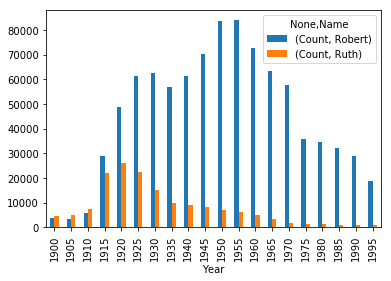

In [258]:
#Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
chosen_names = names_all.query('Name == ["Ruth", "Robert"] & Year == {}'.format([x for x in range(1900,2000,5)])).unstack().plot.bar()


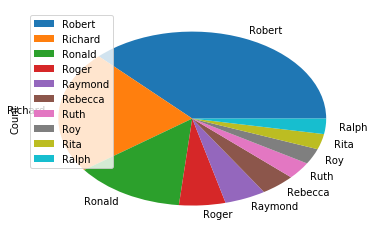

In [344]:
#Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
chosen_names = names_all.query("Year == 1950").reset_index()
a = chosen_names[chosen_names.Name.str.startswith("R")==True].sort_values(by='Count', ascending=False).head(10)
a = a.set_index(a.Name)
a.plot.pie(y="Count")

In [ ]:
#Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

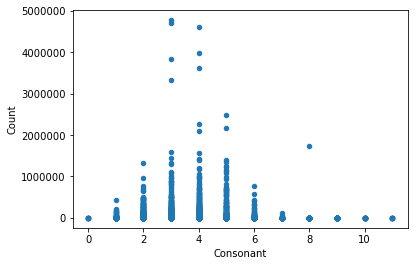

In [386]:
import re


names_all = pd.concat(names_by_year, names=["Year", "Pos"])
big_frame = names_all.groupby(['Name','Gender']).sum().sort_values(by='Count', ascending=False).reset_index()
big_frame['Consonant'] = big_frame.apply(lambda row: len(re.sub(r'[AEIOU]', '', str(row.Name).strip().lower(), flags=re.IGNORECASE)), axis=1)
big_frame.plot.scatter(x='Consonant', y='Count')

In [391]:
import requests
from scipy.cluster.vq import whiten, kmeans2

def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None
    
    
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [400]:
new_teams = []
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    Brazil_players = 0
    for player in players: 
        if player["nationality"] == "Brazil":
            Brazil_players +=1
    
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    wins = 0
    
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            if f['result']['goalsHomeTeam'] > f['result']['goalsAwayTeam']:
                wins +=1
        if team['name'] == f['awayTeamName']:
            if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam']:
                wins +=1 
    print('Team "{}", {} Brazil players, {} wins'.format(team['name'], Brazil_players, wins))
    team['Brazil players'] = Brazil_players
    team['Wins'] = wins
    new_teams.append(team)

Team "FC Rio Ave", 6 Brazil players, 14 wins
Team "FC Porto", 4 Brazil players, 26 wins
Team "Moreirense FC", 9 Brazil players, 8 wins
Team "FC Paços de Ferreira", 6 Brazil players, 8 wins
Team "Sporting CP", 4 Brazil players, 22 wins
Team "Maritimo Funchal", 13 Brazil players, 13 wins
Team "CD Tondela", 7 Brazil players, 8 wins
Team "SL Benfica", 7 Brazil players, 28 wins
Team "Boavista Porto FC", 5 Brazil players, 10 wins
Team "FC Arouca", 9 Brazil players, 9 wins
Team "Vitoria Setubal", 4 Brazil players, 10 wins
Team "C.F. Os Belenenses", 1 Brazil players, 9 wins
Team "Vitoria Guimaraes", 6 Brazil players, 18 wins
Team "Sporting Braga", 8 Brazil players, 15 wins
Team "GD Estoril Praia", 14 Brazil players, 10 wins
Team "Feirense", 0 Brazil players, 14 wins
Team "Nacional Funchal", 5 Brazil players, 4 wins
Team "G.D. Chaves", 0 Brazil players, 8 wins


In [418]:
team_for_pd = []
for team in teams:
    if team['Brazil players']:
        team_for_pd.append({'name': team['name'], 'Brazil players': team['Brazil players'], 'Wins': team['Wins']})
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,Brazil players,Wins,name
0,6,14,FC Rio Ave
1,4,26,FC Porto
2,9,8,Moreirense FC
3,6,8,FC Paços de Ferreira
4,4,22,Sporting CP
5,13,13,Maritimo Funchal
6,7,8,CD Tondela
7,7,28,SL Benfica
8,5,10,Boavista Porto FC
9,9,9,FC Arouca


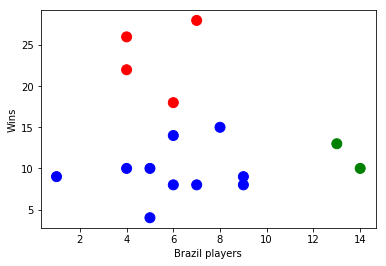

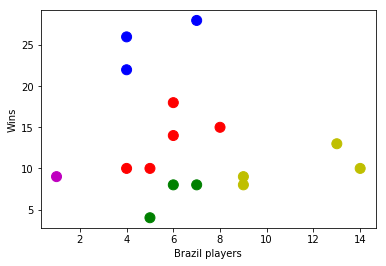

In [419]:
del teams_pd['name']
whitened = whiten(teams_pd.as_matrix())
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
#3 кластера
centroids, cluster_map = kmeans2(whitened, 3)
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='Brazil players', y='Wins', c=colors, s=100)
#5 кластеров
centroids, cluster_map = kmeans2(whitened, 5)
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='Brazil players', y='Wins', c=colors, s=100)